In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Starter_Code/Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

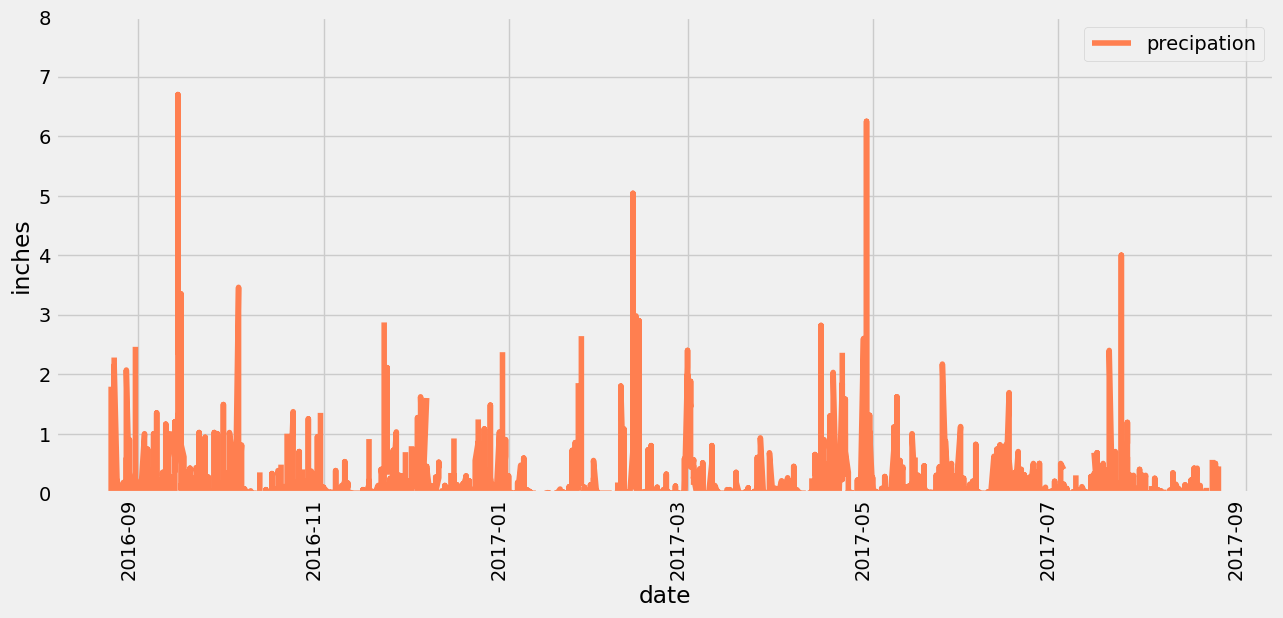

In [66]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year_data = dt.date(2017, 8, 23)-dt.timedelta(days=365)

year_data
# Calculate the date one year from the last date in data set.
#completed above

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=year_data)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measuredf = pd.DataFrame(prcp_scores).rename(columns = {'prcp': 'precipation'})

# Sort the dataframe by date
measuredf['date'] = pd.to_datetime(measuredf['date'], format = '%Y-%m-%d')
measuredf = measuredf.set_index('date')
measuredf = measuredf.sort_values(by = ['date'])
# Use Pandas Plotting with Matplotlib to plot the data
measuredf.plot(figsize = (14,7), rot = 90, color = "coral")
plt.ylim(0,8)
plt.ylabel('inches')
plt.xlabel('date')
plt.legend(loc = 'upper right')

In [67]:
# Use Pandas to calculate the summary statistics for the precipitation data
summstat = measuredf.describe()
summstat

,precipation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [73]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).first().__dict__
session.query(Measurement).first().__dict__
num = len(session.query(Station).all())
print(num)

9


In [95]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station,
                              func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
#print(active_station)
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [110]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
review = [Measurement.station,
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]

most_active_ID = session.query(*review).filter_by(station = "USC00519281").all()

print(f"The lowest temperature for {most_active_ID[0][0]} is {most_active_ID[0][1]}°.")
print(f"The highest temperature for {most_active_ID[0][0]} is {most_active_ID[0][2]}°.")
print(f"The average temperature for {most_active_ID[0][0]} is {most_active_ID[0][3]}°.")

The lowest temperature for USC00519281 is 54.0°.
The highest temperature for USC00519281 is 85.0°.
The average temperature for USC00519281 is 71.66378066378067°.


Text(0.5, 4.183333333333314, 'Temperature')

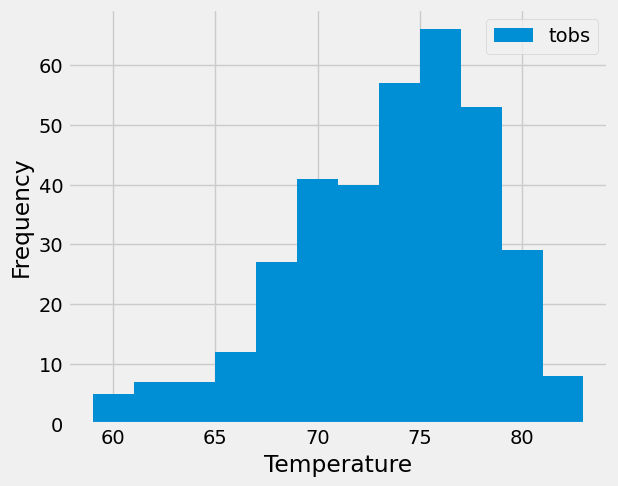

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()